<a href="https://colab.research.google.com/github/ankitb808/ids-first-repo/blob/main/Customers_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [ ]:
data=pd.read_csv("/content/Customers.csv")

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [ ]:
data.tail()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2
1999,2000,Male,90,110610,52,Entertainment,5,2


In [ ]:
# Selecting relevant features for clustering ignore non numeric
features = data[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']]


In [ ]:
# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Convert the scaled features into a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)


In [ ]:
scaled_features_df.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,-1.054089,-2.093501,-0.428339,-0.791207,0.117497
1,-0.983723,-1.656133,1.075546,-0.281162,-0.390051
2,-1.018906,-0.540845,-1.609962,-0.791207,-1.405148
3,-0.913356,-1.131292,0.932319,-1.046230,-0.897599
4,-0.631891,-1.590528,-0.392532,-0.536185,1.132594


In [ ]:
# Elbow Method to find the optimal number of clusters
inertia_values = []
k_range = range(1, 11)

In [ ]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42) # Assuming you want to use KMeans
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

ValueError: x and y must have same first dimension, but have shapes (10,) and (21,)

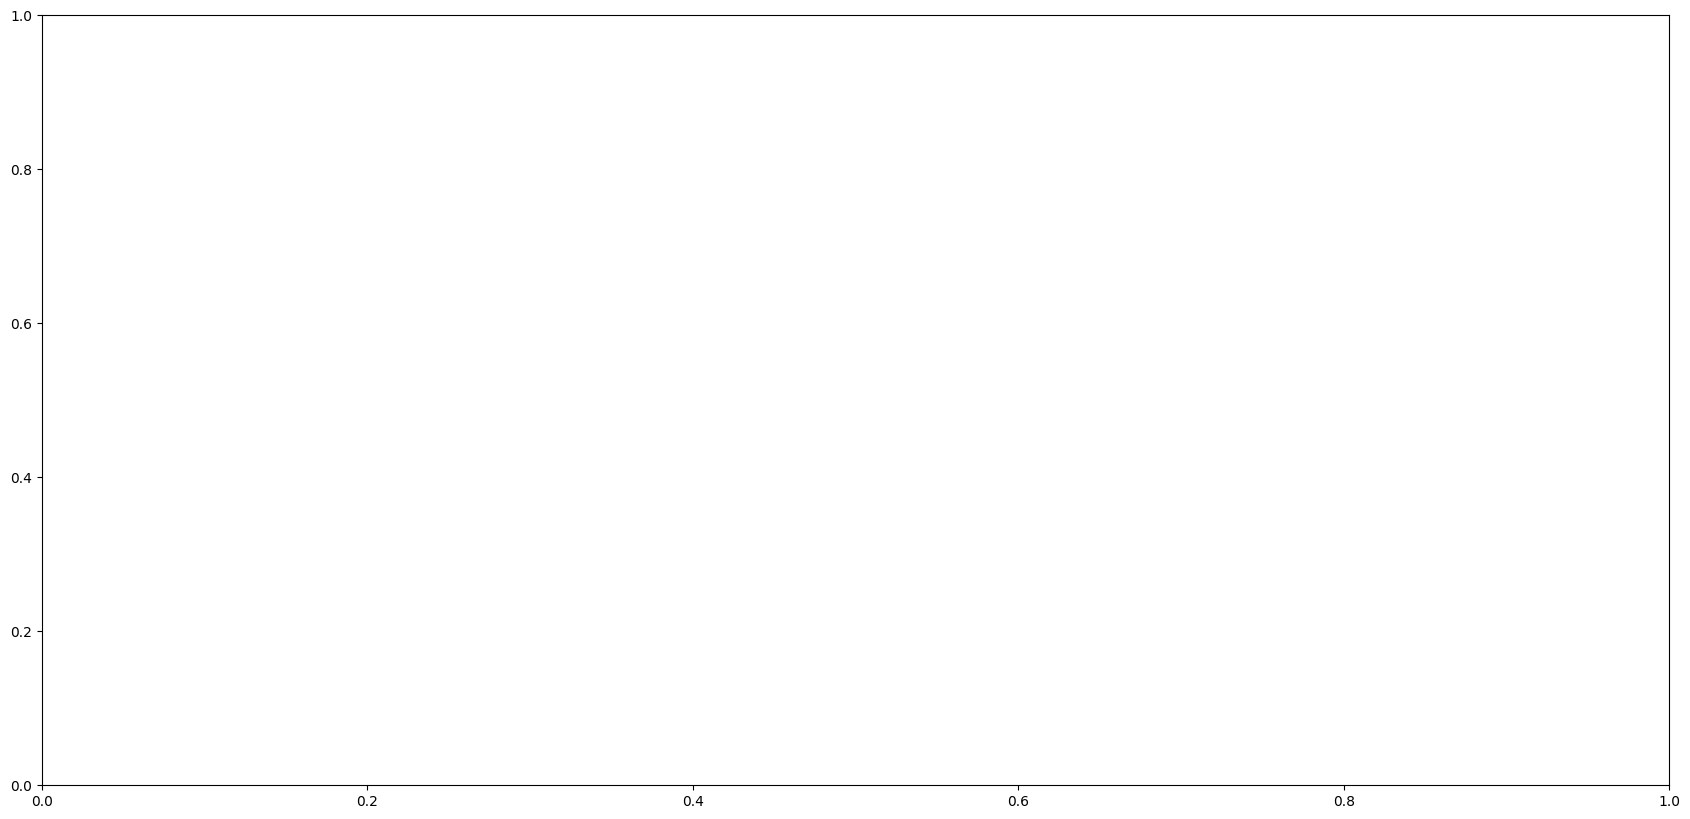

In [ ]:
# Plotting the results
plt.figure(figsize=(21, 10))
plt.plot(k_range, inertia_values, marker='o') # k_range and inertia_values should now have the same length
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (21,)

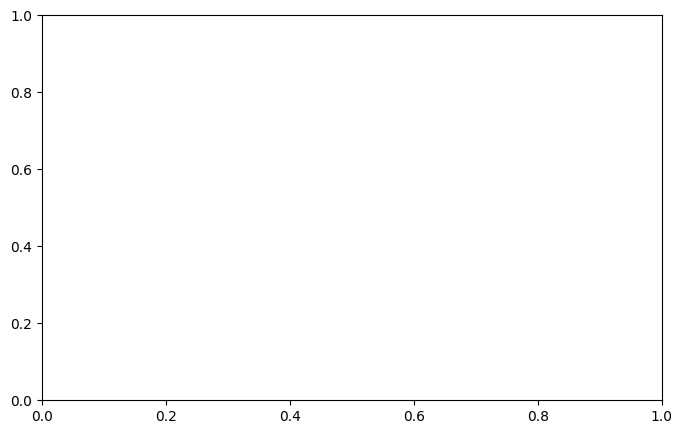

In [ ]:
# Alternative plotting code
plt.figure(figsize=(8, 5))  # Adjust figure size if needed
plt.plot(list(k_range), inertia_values, marker='o', linestyle='-', color='b')  # Ensure proper conversion and styling
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)  # Add grid lines for better readability
plt.show()